# Example for 3D sampling in regular and irregular geometry.
Teh files datageom.dat and datageomireg.dat contain one row per seismic trace, and four collumns
Sx, Sy, Gx, Gy. You can choose in the first cell to use one or the other (A or B)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Part choice
part = 'B'

# Load data based on part selection
if part == 'A':
    A = np.loadtxt('datageom.dat')
elif part == 'B':
    A = np.loadtxt('datageomireg.dat')



In [10]:
# coordinates of the first 5 traces are printed below
print("coord", "sx", "sy", "gx", "gy")
for i in range(5):
    print("trace", i, A[i,:])


coord sx sy gx gy
trace 0 [ 1. -7.  1. -1.]
trace 1 [ 1. -7. -2.  4.]
trace 2 [ 1. -7. -2. 23.]
trace 3 [ 1. -7.  1. 36.]
trace 4 [ 1. -7.  0. 38.]


(0.0, 1000.0, 0.0, 1000.0)

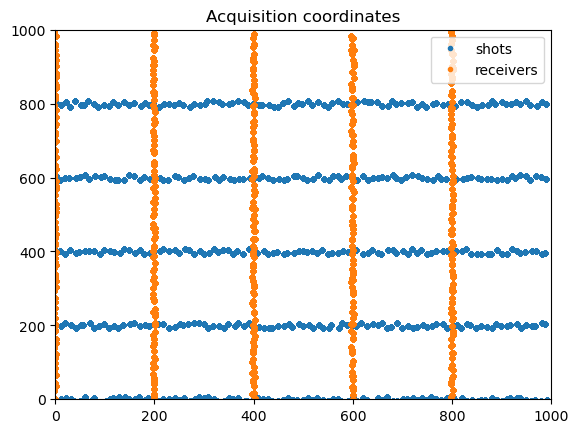

In [15]:
# Acquisition coordinates
sxa, sya = A[:, 0], A[:, 1]
gxa, gya = A[:, 2], A[:, 3]

# Plot acquisition coordinates
plt.figure(1)
#plt.subplot(221)
plt.plot(sxa, sya, '.', label='shots')
plt.plot(gxa, gya, '.', label='receivers')
plt.title('Acquisition coordinates')
plt.legend()
plt.axis([0, 1000, 0, 1000])


(350.0, 500.0, -35.0, 35.0)

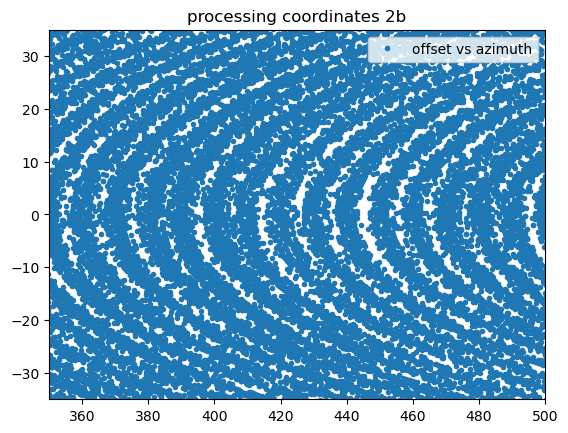

In [14]:
# Processing coordinates - Offset and Azimuth
oxa = sxa - gxa
oya = sya - gya
oa = np.sqrt(oxa ** 2 + oya ** 2)

# Avoid division by zero
oxa[oxa == 0] = 1
azimuth = np.arctan(oya / oxa) * 180 / np.pi

#plt.subplot(224)
plt.plot(oa, azimuth, '.')
plt.title('processing coordinates 2b')
plt.legend(['offset vs azimuth'])
plt.axis([350, 500, -35, 35])


(-100.0, 100.0, -100.0, 100.0)

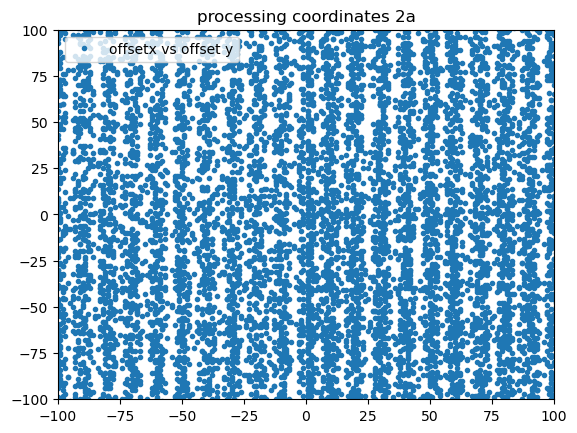

In [16]:
#plt.subplot(223)
plt.plot(oxa, oya, '.')
plt.title('processing coordinates 2a')
plt.legend(['offsetx vs offset y'])
plt.axis([-100, 100, -100, 100])


(350.0, 450.0, 350.0, 450.0)

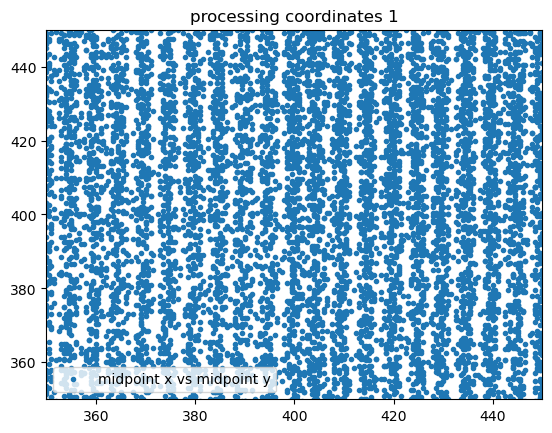

In [18]:
# Midpoint coordinates
mxa = (sxa + gxa) / 2
mya = (sya + gya) / 2

#plt.subplot(222)
plt.plot(mxa, mya, '.')
plt.legend(['midpoint x vs midpoint y'])
plt.title('processing coordinates 1')
plt.axis([350, 450, 350, 450])

(350.0, 450.0, 350.0, 450.0)

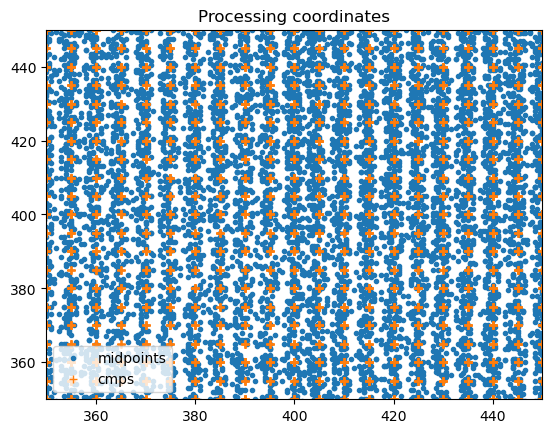

In [19]:
# Binning
dx, dy = 5, 5
plt.figure(2)
cmpx = np.round(mxa / dx) * dx
cmpy = np.round(mya / dy) * dy
plt.plot(mxa, mya, '.', label='midpoints')
plt.plot(cmpx, cmpy, '+', label='cmps')
plt.title('Processing coordinates')
plt.legend()
plt.axis([350, 450, 350, 450])

## Part 2: Choose one shot and plot its coordinates

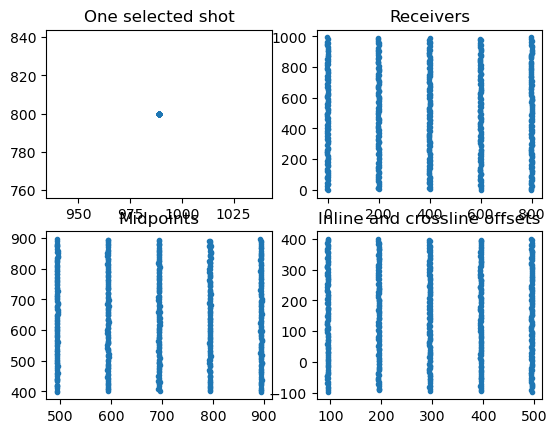

In [20]:

# Part B: Choose one shot and plot its coordinates
indexes = np.where(A[:, 0] == 989)[0]
shot989 = A[indexes, :]

plt.figure(4)
plt.subplot(221)
plt.plot(shot989[:, 0], shot989[:, 1], '.')
plt.title('One selected shot')

plt.subplot(222)
plt.plot(shot989[:, 2], shot989[:, 3], '.')
plt.title('Receivers')

midshot989x = (shot989[:, 0] + shot989[:, 2]) / 2
midshot989y = (shot989[:, 1] + shot989[:, 3]) / 2

plt.subplot(223)
plt.plot(midshot989x, midshot989y, '.')
plt.title('Midpoints')

offshot989x = (shot989[:, 0] - shot989[:, 2]) / 2
offshot989y = (shot989[:, 1] - shot989[:, 3]) / 2

plt.subplot(224)
plt.plot(offshot989x, offshot989y, '.')
plt.title('Inline and crossline offsets')

plt.show()
